In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd



In [2]:
df = pd.read_excel(io='data/Online Retail.xlsx', sheet_name='Online Retail') 

# Load Data

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Product Analytics

#### - Quantity Distribution

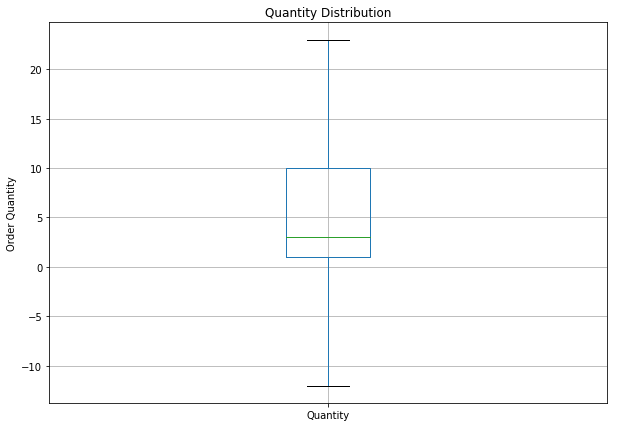

In [5]:
ax = df['Quantity'].plot.box(
    showfliers = False,
    grid=True,
    figsize=(10,7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

In [7]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [9]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [10]:
df.shape

(541909, 8)

#### - Time-series Number of Orders

In [11]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [12]:
monthly_orders_df

InvoiceDate
2010-12-31    2025
2011-01-31    1476
2011-02-28    1393
2011-03-31    1983
2011-04-30    1744
2011-05-31    2162
2011-06-30    2012
2011-07-31    1927
2011-08-31    1737
2011-09-30    2327
2011-10-31    2637
2011-11-30    3462
2011-12-31    1015
Freq: M, Name: InvoiceNo, dtype: int64

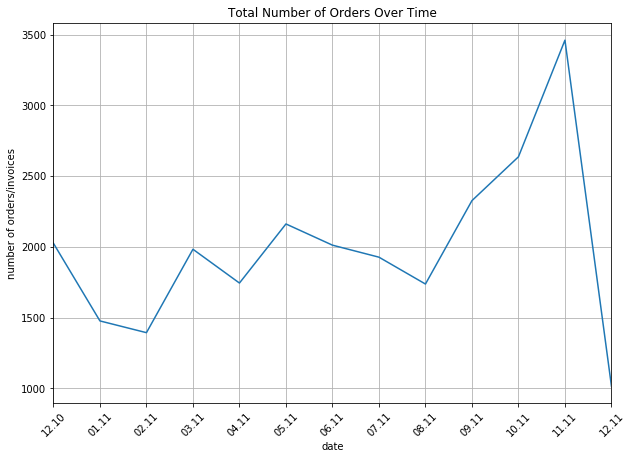

In [13]:
ax = pd.DataFrame(monthly_orders_df.values).plot(

    grid=True,
    figsize=(10, 7),
    legend=False
    
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(

    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%y') for x in monthly_orders_df.index],
    rotation=45
    
)

plt.show()

In [24]:
invoice_dates = df.loc[df['InvoiceDate'] >= '2011-12-01', 'InvoiceDate']


In [25]:
minimum = invoice_dates.min()
maximum = invoice_dates.max()


In [26]:
print('Min date: %s\nMax date: %s' % (minimum, maximum))

Min date: 2011-12-01 08:12:00
Max date: 2011-12-09 12:50:00


In [27]:
df.loc[df['InvoiceDate'] > '2011-12-01'].shape

(25525, 8)

In [29]:
df.shape

(541909, 8)

In [3]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [4]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique() 

In [5]:
monthly_orders_df

InvoiceDate
2010-12-31    2025
2011-01-31    1476
2011-02-28    1393
2011-03-31    1983
2011-04-30    1744
2011-05-31    2162
2011-06-30    2012
2011-07-31    1927
2011-08-31    1737
2011-09-30    2327
2011-10-31    2637
2011-11-30    3462
Freq: M, Name: InvoiceNo, dtype: int64

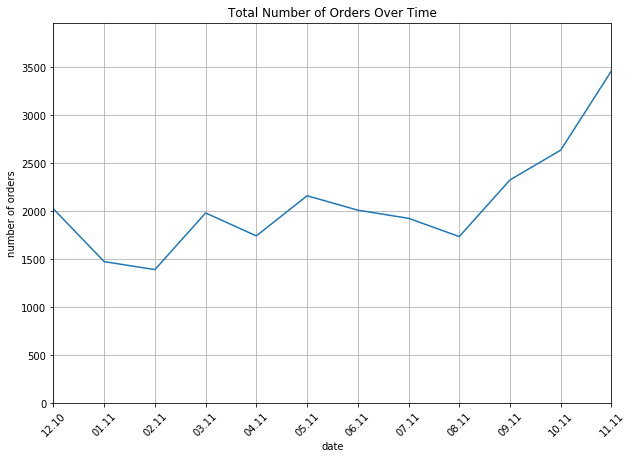

In [12]:
ax = pd.DataFrame(monthly_orders_df.values).plot(

        grid = True,
        figsize = (10,7),
        legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders_df.values + 500)])

plt.xticks(
    
    range(len(monthly_orders_df.values)),
    [x.strftime('%m.%y') for x in monthly_orders_df.index],
    rotation=45

)

plt.show()

In [17]:
import numpy as np
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [19]:
range(len(monthly_orders_df.values))

range(0, 12)

#### -Time-series Revenue

In [3]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [28]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [29]:
monthly_revenue_df

InvoiceDate
2010-12-31     748957.020
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
2011-12-31     433668.010
Freq: M, Name: Sales, dtype: float64

In [24]:
df.set_index('InvoiceDate')['Sales'].resample('M')

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

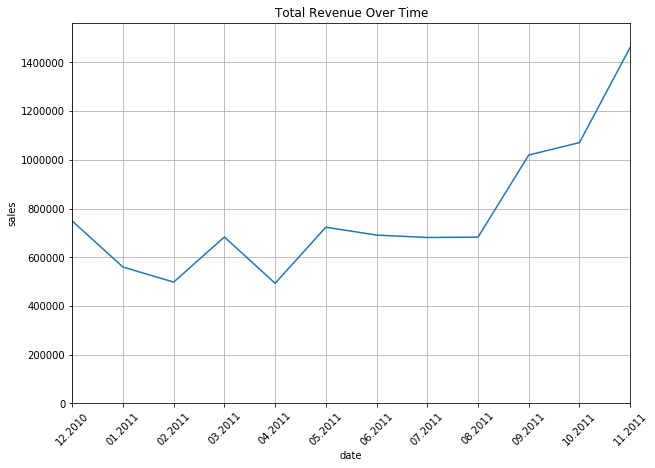

In [51]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid= True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index], 
    rotation=45
)

plt.show()

In [30]:
monthly_revenue_df

InvoiceDate
2010-12-31     748957.020
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
Freq: M, Name: Sales, dtype: float64

In [33]:
range(len(monthly_revenue_df.index))

range(0, 12)

#### - Time-series Repeat Customer

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
invoice_customer_df = df.groupby(

    by=['InvoiceNo', 'InvoiceDate']

).agg({
    
    'Sales': sum,
    'CustomerID' : max,
    'Country' : max,
    
}).reset_index()

In [6]:
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [14]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    
    pd.Grouper(freq='M'), 'CustomerID'
    
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [15]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    357
2011-01-31    256
2011-02-28    246
2011-03-31    323
2011-04-30    271
2011-05-31    398
2011-06-30    333
2011-07-31    327
2011-08-31    299
2011-09-30    400
2011-10-31    446
2011-11-30    674
2011-12-31    150
Freq: M, Name: CustomerID, dtype: int64

In [16]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [17]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     948
2011-01-31     783
2011-02-28     798
2011-03-31    1020
2011-04-30     899
2011-05-31    1079
2011-06-30    1051
2011-07-31     993
2011-08-31     980
2011-09-30    1302
2011-10-31    1425
2011-11-30    1711
2011-12-31     686
Freq: M, Name: CustomerID, dtype: int64

In [18]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df * 100

In [19]:
monthly_repeat_percentage

InvoiceDate
2010-12-31    37.658228
2011-01-31    32.694764
2011-02-28    30.827068
2011-03-31    31.666667
2011-04-30    30.144605
2011-05-31    36.886006
2011-06-30    31.684110
2011-07-31    32.930514
2011-08-31    30.510204
2011-09-30    30.721966
2011-10-31    31.298246
2011-11-30    39.392168
2011-12-31    21.865889
Freq: M, Name: CustomerID, dtype: float64

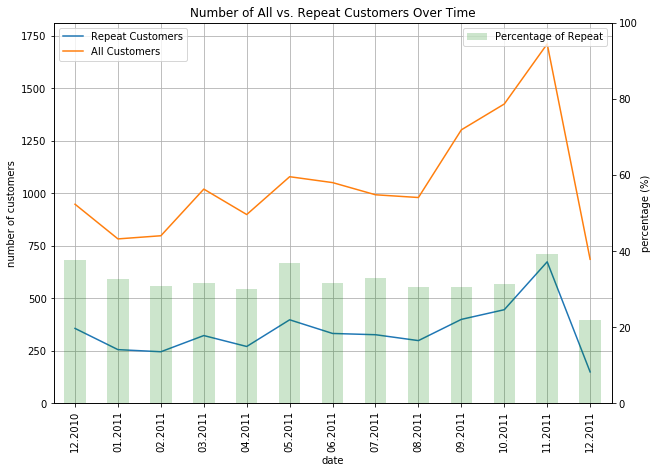

In [25]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10, 7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(

    
    ax=ax,
    grid=True,
    secondary_y = True,
    color = 'green',
    alpha = 0.2

)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='Upper Right')

ax.set_ylim([0, monthly_unique_customers_df.values.max() + 100])
ax2.set_ylim([0, 100])

plt.xticks(

    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
    rotation=45
)

plt.show()

#### -Revenue from Repeat Customers

In [26]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    
    pd.Grouper(freq='M'), 'CustomerID'
    
]).filter(lambda x: len(x) > 1 ).resample('M').sum()['Sales']

In [30]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.00

In [31]:
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    51.007118
2011-01-31    47.121155
2011-02-28    44.791897
2011-03-31    47.786233
2011-04-30    44.320540
2011-05-31    55.969130
2011-06-30    54.172287
2011-07-31    50.808449
2011-08-31    50.870447
2011-09-30    54.381516
2011-10-31    54.212831
2011-11-30    51.000890
2011-12-31    38.668229
Freq: M, Name: Sales, dtype: float64

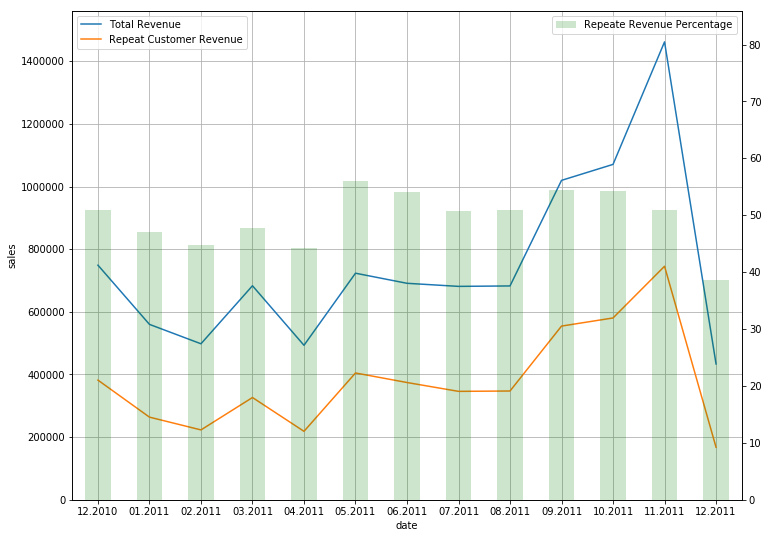

In [35]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(

    figsize=(12, 9)
)

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
 ax=ax,
 grid=True
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_label('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values) + 100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
        
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2

)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values) + 30])
ax2.set_label('percentage (%)')
ax2.legend(['Repeate Revenue Percentage'])

ax2.set_xticklabels([
    
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

#### -Popular Items Over Time

In [39]:
date_item_df = pd.DataFrame(
    
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)

date_item_df

Quantity
InvoiceDate StockCode             
2010-12-31  10002              251
            10120               16
            10125              154
            10133              130
            10135              411
            11001               73
            15034               45
            15036              113
            15039               20
            16008               14
            16010               12
            16011               94
            16012              120
            16014             1029
            16015               21
            16016               28
            16033              240
            16045              100
            16046               10
            16048               27
            16052                2
            16054                2
            16216               20
            16218                8
            16219               13
            16225              272
            16235              154
            16236               58
            16237              615
            16238               86
...                            ...
2011-12-31  90214E              25
            90214F              13
            90214G              25
            90214H              13
            90214I              13
            90214J              13
            90214K              26
            90214L              36
            90214M              12
            90214N              15
            90214O              13
            90214P              25
            90214R              13
            90214S              25
            90214T              12
            90214U              12
            90214V              12
            90214W              12
            90214Y              60
            90214Z              12
            AMAZONFEE           -2
            BANK CHARGES         1
            C2                   4
            CRUK                -1
            D                   -1
            DCGSSBOY             1
            DOT                 17
            M                  795
            POST               121
            gift_0001_10         1

[34691 rows x 1 columns]

In [40]:
# Rank item by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(by='Quantity', ascending=False).reset_index()

last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14883
1,2011-11-30,84826,12551
2,2011-11-30,22197,12159
3,2011-11-30,22086,7868
4,2011-11-30,85099B,5807
5,2011-11-30,22578,5365
6,2011-11-30,84879,5254
7,2011-11-30,22577,5003
8,2011-11-30,85123A,4648
9,2011-11-30,84077,4559


In [41]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(

    df.loc[
        
        
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)

date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2453
            22197          2731
            84826           306
            85099B         2126
2011-01-31  22086            24
            22197          1809
            84826           480
            85099B         2639
2011-02-28  22086             5
            22197          2663
            84826            66
            85099B         3078
2011-03-31  22086            87
            22197          2798
            84826            60
            85099B         5281
2011-04-30  22086           -27
            22197          1856
            84826             1
            85099B         2452
2011-05-31  22086            17
            22197          6848
            23084          1131
            85099B         3617
2011-06-30  22086           344
            22197          2092
            23084          1693
            84826             4
            85099B         3676
2011-07-31  22086           377
            22197          1862
            23084           318
            84826             2
            85099B         3126
2011-08-31  22086           370
            22197          5416
            23084          1783
            84826            72
            85099B         5401
2011-09-30  22086          2106
            22197          4153
            23084           196
            85099B         4267
2011-10-31  22086          3189
            22197          5865
            23084          6344
            84826            11
            85099B         4803
2011-11-30  22086          7868
            22197         12159
            23084         14883
            84826         12551
            85099B         5807
2011-12-31  22086          2089
            22197          6198
            23084          4298
            84826            92
            85099B         1090

In [43]:
trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)


trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
trending_items_df.columns = trending_items_df.columns.droplevel(0)

trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2453.0,2731.0,0.0,306.0,2126.0
2011-01-31,24.0,1809.0,0.0,480.0,2639.0
2011-02-28,5.0,2663.0,0.0,66.0,3078.0
2011-03-31,87.0,2798.0,0.0,60.0,5281.0
2011-04-30,-27.0,1856.0,0.0,1.0,2452.0
2011-05-31,17.0,6848.0,1131.0,0.0,3617.0
2011-06-30,344.0,2092.0,1693.0,4.0,3676.0
2011-07-31,377.0,1862.0,318.0,2.0,3126.0
2011-08-31,370.0,5416.0,1783.0,72.0,5401.0


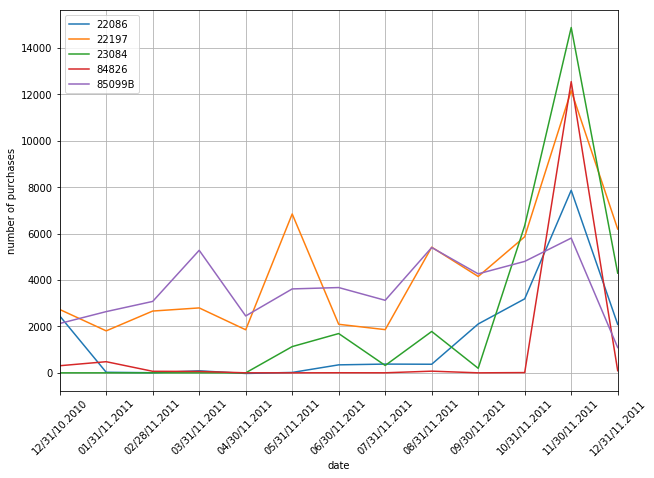

In [45]:
ax = pd.DataFrame(trending_items_df.values).plot(

        figsize=(10, 7),
        grid=True

)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_label('Item Trends Over Time')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(

    range(len(trending_items_df.index)),
    [x.strftime('%x.%Y') for x in trending_items_df.index],
    rotation=45

)

plt.show()